In [73]:
!pip install seaborn wordcloud matplotlib

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [88]:
random_seed = 421

# Course counts per genre

In [4]:
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
course_df = pd.read_csv(course_genre_url)
course_df.dtypes

COURSE_ID          object
TITLE              object
Database            int64
Python              int64
CloudComputing      int64
DataAnalysis        int64
Containers          int64
MachineLearning     int64
ComputerVision      int64
DataScience         int64
BigData             int64
Chatbot             int64
R                   int64
BackendDev          int64
FrontendDev         int64
Blockchain          int64
dtype: object

In [5]:
course_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [77]:
course_df.describe()

,COURSE_ID,TITLE,DESCRIPTION
count,307,307,307
unique,307,293,299
top,ML0201EN,deep learning with tensorflow,majority of data in the world are unlabeled an...
freq,1,3,4


In [12]:
topics_df = course_df.iloc[:,2:]
topics_df = topics_df.sum(axis=0).sort_values(ascending=False)
topics_df = topics_df.reset_index()
topics_df.columns = ['Genre', 'Count']

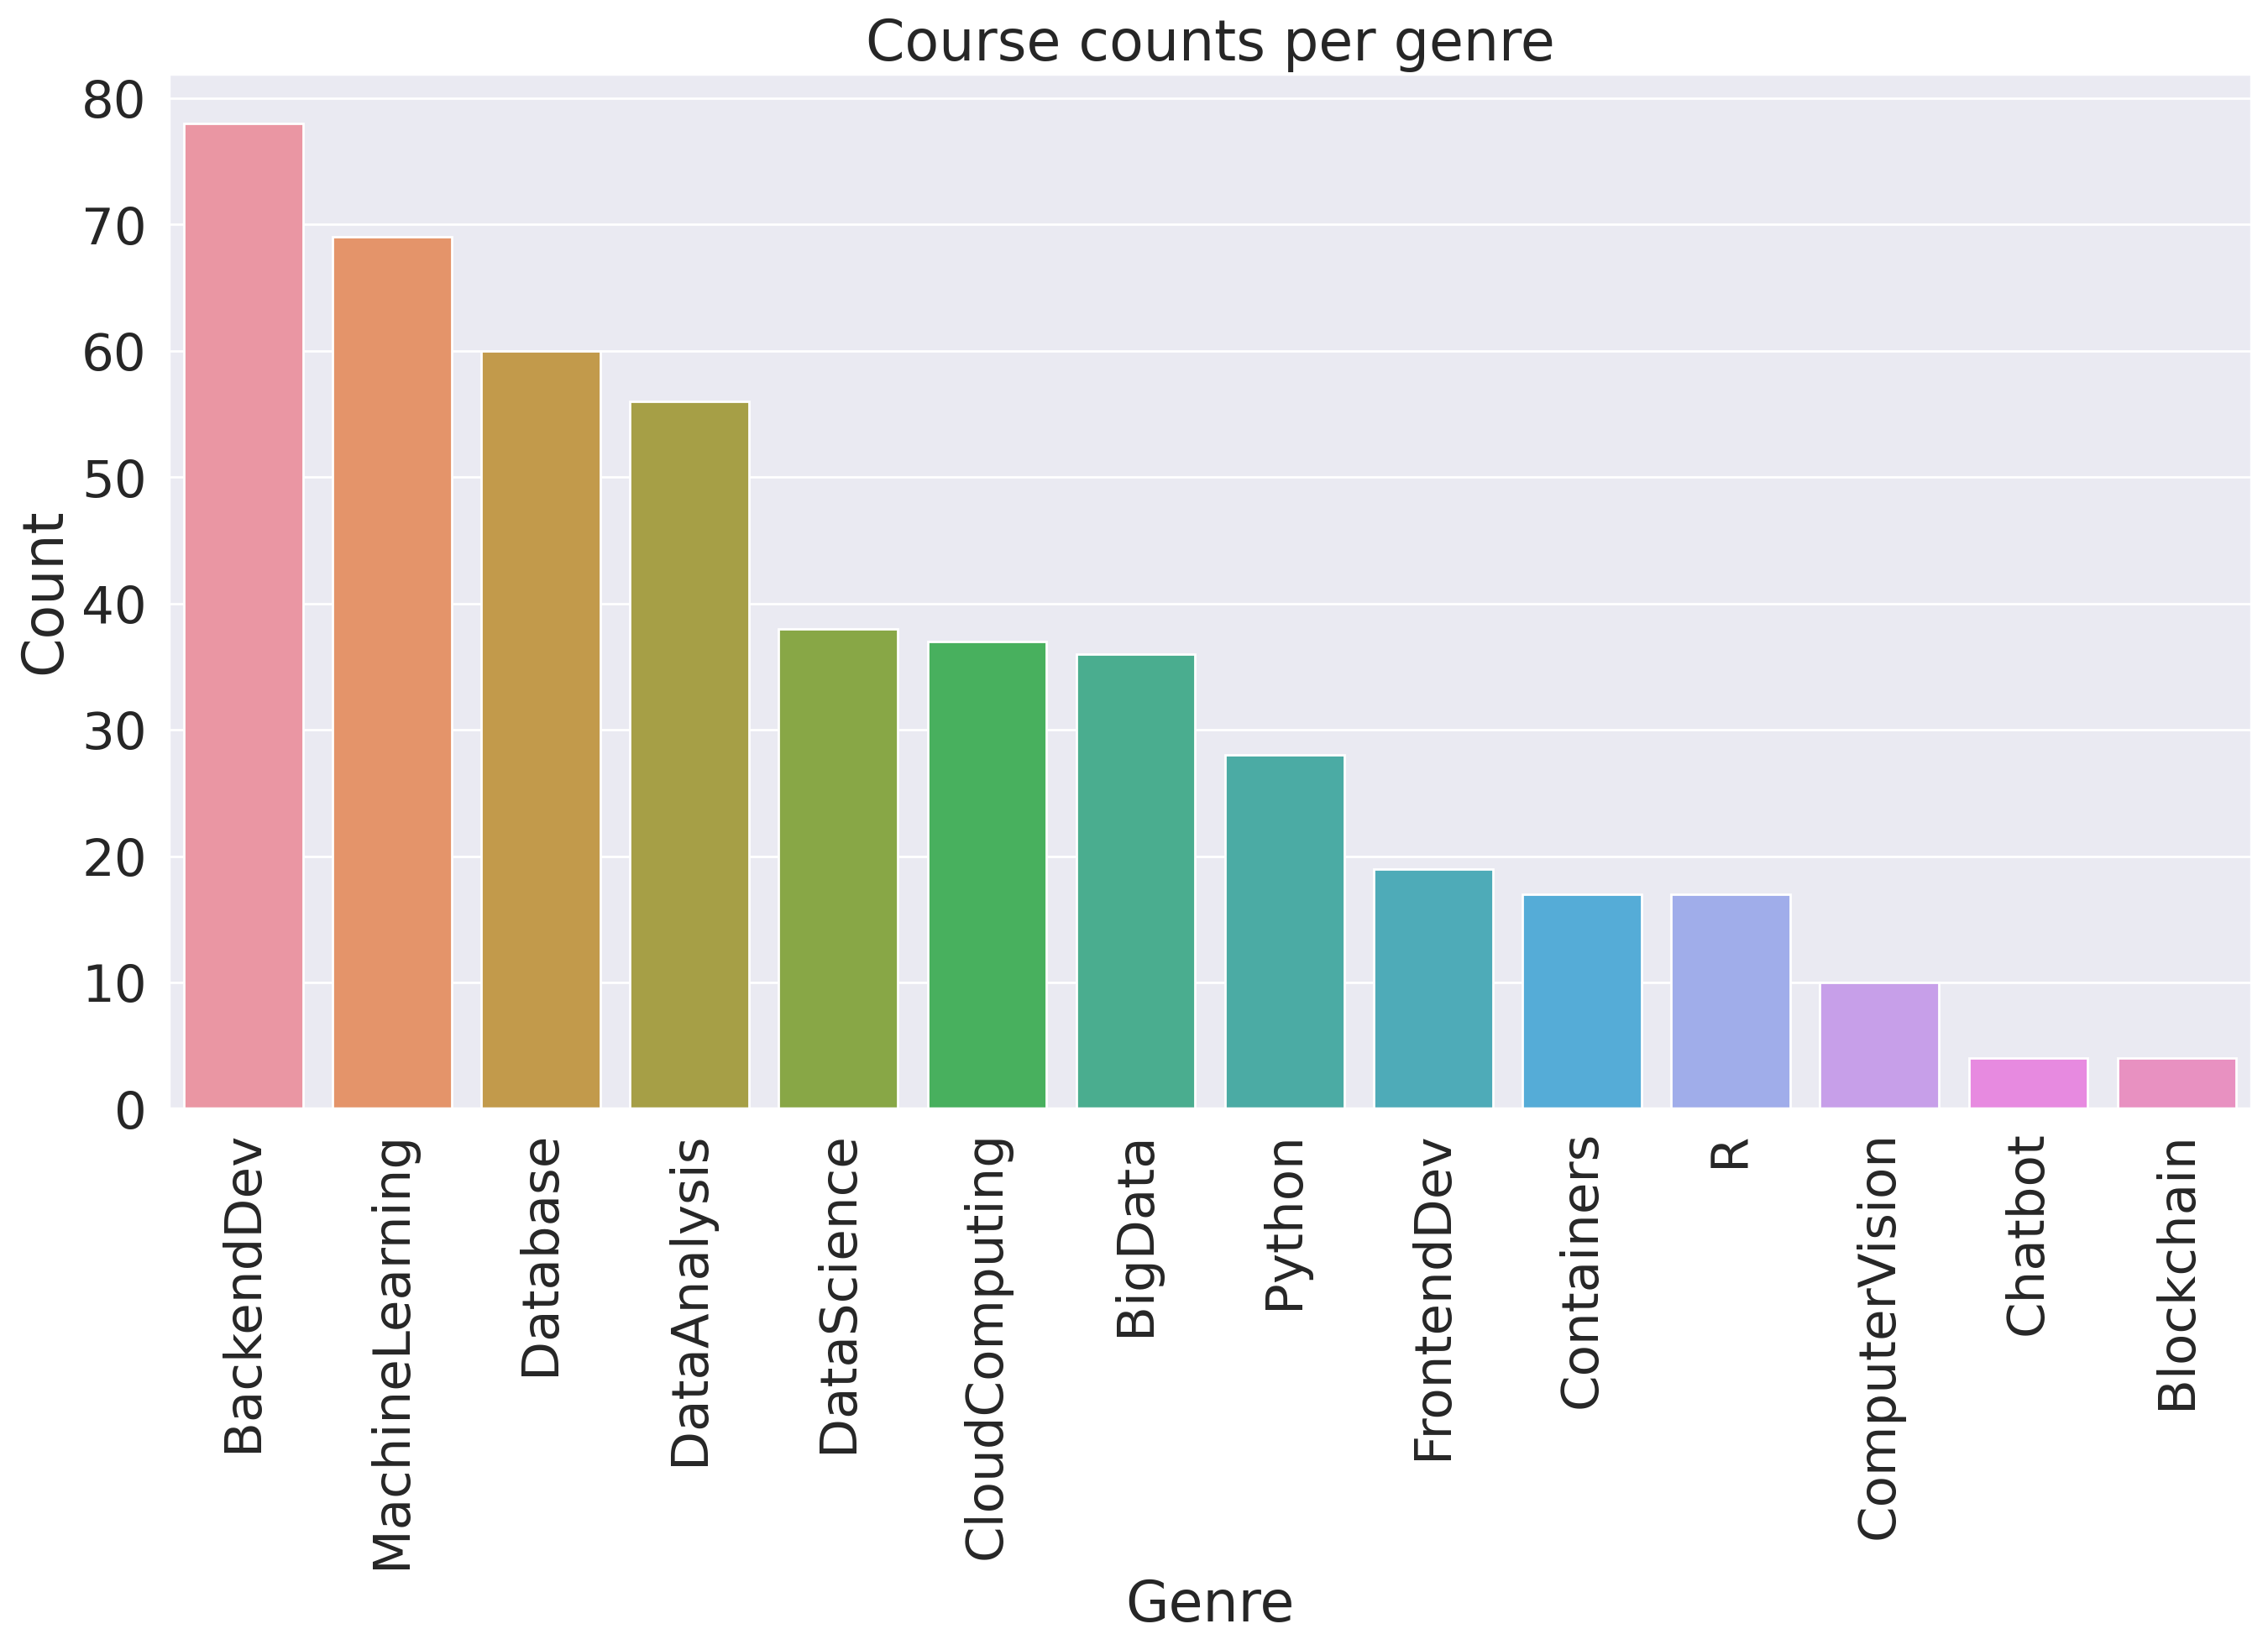

In [29]:
plt.figure(figsize=(16, 8), dpi=200)
sns.set(font_scale=2)
sns.barplot(x='Genre', y='Count', data=topics_df)
plt.xticks(rotation=90)
plt.title('Course counts per genre')
plt.show()

# Course enrollment distribution

In [36]:
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-ML0321EN-Coursera/labs/v2/module_3/ratings.csv"
ratings_df = pd.read_csv(ratings_url)
ratings_df.describe()

,user,rating
count,2.333060e+05,233306.000000
mean,1.099162e+06,3.998448
std,4.771661e+05,0.816058
min,2.000000e+00,3.000000
25%,7.210400e+05,3.000000
50%,1.080061e+06,4.000000
75%,1.466616e+06,5.000000
max,2.103039e+06,5.000000


In [ ]:
### test_users = test_users_df.groupby(['user']).max().reset_index(drop=False)

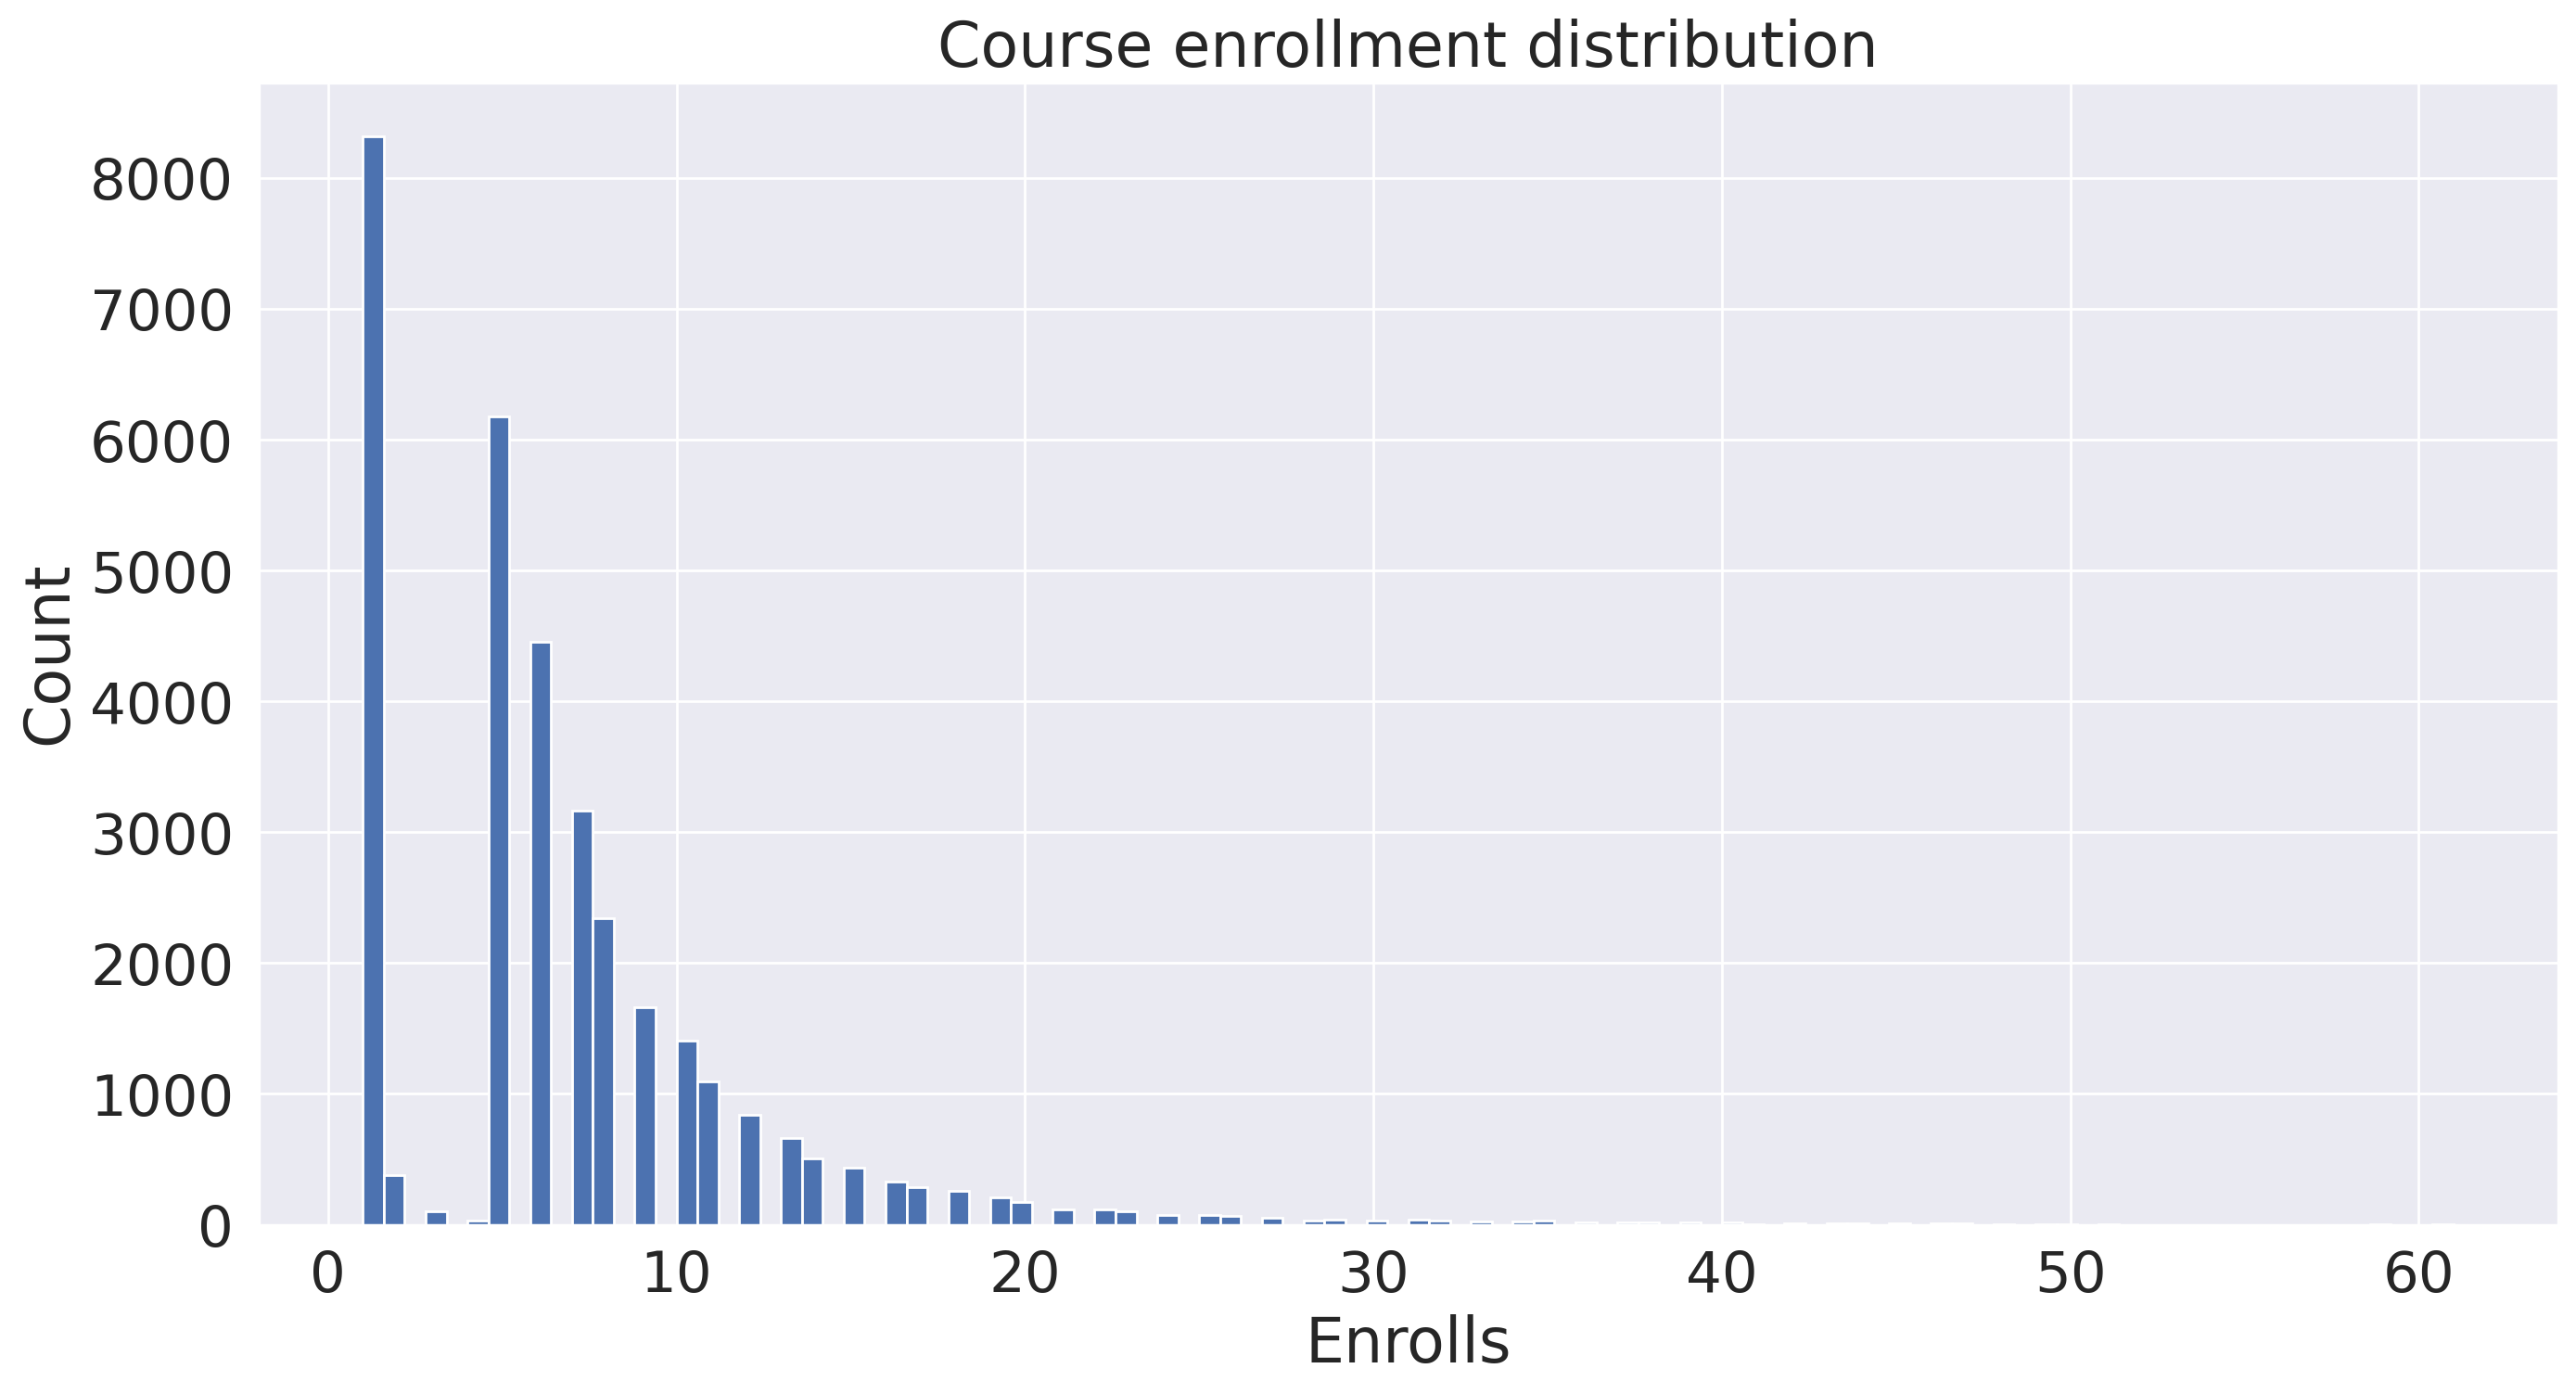

In [43]:
plt.figure(figsize=(16, 8), dpi=200)
ratings_df.groupby('user').size().hist(bins=100)
plt.title('Course enrollment distribution')
plt.xlabel('Enrolls')
plt.ylabel('Count')
plt.show()

# 20 most popular courses

In [70]:
df = ratings_df.groupby('item').size().reset_index()
df.columns=['Course', 'Enrolls']
df = df.sort_values(by='Enrolls', ascending=False).reset_index(drop=True).iloc[:20]

df2 = pd.merge(df, course_df[['COURSE_ID', 'TITLE']], how='left', left_on='Course', right_on='COURSE_ID')
df2.drop(labels='COURSE_ID', axis=1)

,Course,Enrolls,TITLE
0,PY0101EN,14936,python for data science
1,DS0101EN,14477,introduction to data science
2,BD0101EN,13291,big data 101
3,BD0111EN,10599,hadoop 101
4,DA0101EN,8303,data analysis with python
5,DS0103EN,7719,data science methodology
6,ML0101ENv3,7644,machine learning with python
7,BD0211EN,7551,spark fundamentals i
8,DS0105EN,7199,data science hands on with open source tools
9,BC0101EN,6719,blockchain essentials


# Word cloud of course titles

In [84]:
words = course_df['TITLE']
words = ' '.join(words)

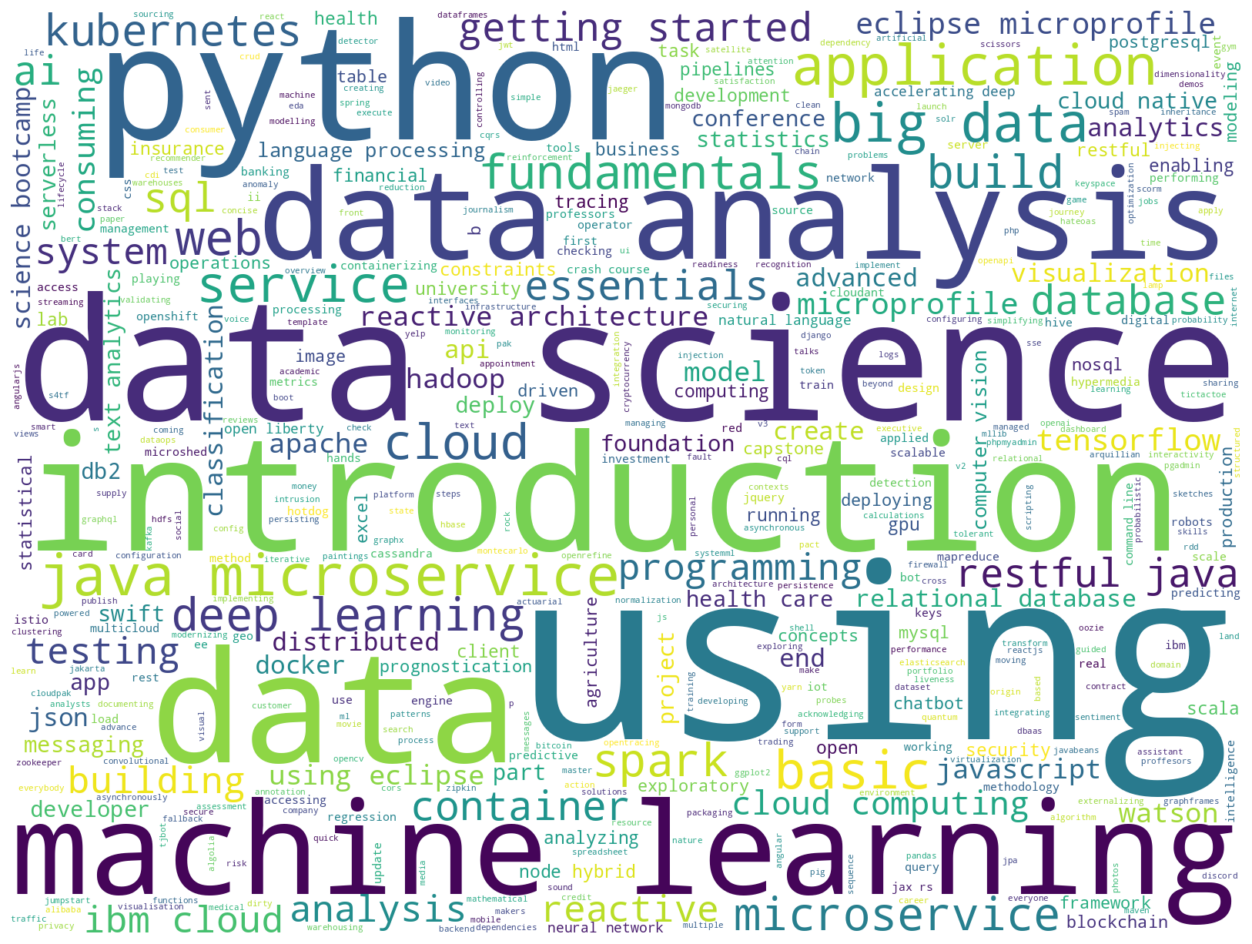

In [89]:
wordcloud = WordCloud(background_color="white", max_words=1000, random_state=random_seed, width=1600, height=1200)
wordcloud.generate(words)
plt.figure(figsize=(16, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
